In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Preparing data

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
data.loc[data['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [8]:
# судя по площадям данных квартир делаем вывод, что количество комнат введено ошибочно
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2
data.loc[data['Id'] == 8491, 'Rooms'] = 1

In [9]:
data.loc[data['Rooms'] < 1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [10]:
data.loc[data['Id'].isin([12638, 7917]), 'Rooms'] = 5
data.loc[data['Id'].isin([456,9443]), 'Rooms'] = 3
data.loc[data['Id'].isin([7317, 770, 3159, 3224]), 'Rooms'] = 1

In [11]:
data.Rooms.describe()

count    10000.000000
mean         1.888700
std          0.812637
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: Rooms, dtype: float64

In [12]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [13]:
# Исправим некорректные значения HouseYear
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

### Splitting on training and validation data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [16]:
train.shape, valid.shape

((7000, 20), (3000, 20))

### Try to improve model with adding statistics as  features columns

In [17]:
stat1 = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price1'})
stat2 = train.groupby('Rooms', as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price2'})
mean_price = train['Price'].mean()

In [18]:
def add_mean_price(df, stat1, stat2, mean_price):
    df = pd.merge(df, stat1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, stat2, on='Rooms', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price)
    df['mean_price1'] = df['mean_price1'].fillna(df['mean_price2'])
    return df

### Make functions for processing train, valid and test data

In [19]:
def clean_rooms(df, source_df):
    df.loc[df['Rooms'] > 6, 'Rooms'] = source_df['Rooms'].median()
    return df

In [20]:
def clean_square(df, source_df):
    df.loc[df['Square'] < 15, 'Square'] = source_df['Square'].mean()
    df.loc[df['Square'] >300, 'Square'] = source_df['Square'].mean()
    df.loc[df['KitchenSquare'] < 4, 'KitchenSquare'] = source_df['KitchenSquare'].mean()
    df.loc[df['KitchenSquare'] > 25, 'KitchenSquare'] = source_df['KitchenSquare'].mean()
    return df

In [21]:
def clean_year(df, source_df):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = source_df['HouseYear'].median()
    return df

In [22]:
# Подготовка LifeSquare
def edit_lf_sq(df, source_df):
    df['LifeSquare'] = df['LifeSquare'].fillna(df['Square'] - df['KitchenSquare'])
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = source_df['LifeSquare'].mean()
    df.loc[df['LifeSquare'] < df['KitchenSquare'], 'LifeSquare'] = source_df['LifeSquare'].mean()
    return df

In [23]:
# Обработка признаков Floor и HouseFloor
def edit_HF(df, source_df):
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = source_df['HouseFloor'].median()
    df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = source_df['Floor'].median()
    return df

In [24]:
def add_cat_fts(df, cat_fts):
    for col in cat_fts:
        df[col] = (df[col] == 'B').astype(int)
    return df

In [25]:
def fillna_healthcare_1(df):
    df['Healthcare_1'] = df['Healthcare_1'].fillna(0)
    return df

In [26]:
def prepare_data(df, source_df = train, cat_fts=('Ecology_2', 'Ecology_3', 'Shops_2')):# stat1=stat1, stat2=stat2, mean_price=mean_price):
    df = clean_rooms(df, source_df)
    df = clean_square(df, source_df)
    df = clean_year(df, source_df)
    df = edit_lf_sq(df, source_df)
    df = edit_HF(df, source_df)
    df = add_cat_fts(df, cat_fts)
    df = fillna_healthcare_1(df)
    #df = add_mean_price(df, stat1, stat2, mean_price) 
    return df

In [27]:
train = prepare_data(train)

In [28]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.000000,14.0,17.0,2015.0,0.075779,1,1,6,1437,3,0.0,0,2,1,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.000000,7.0,3.0,1977.0,0.014073,1,1,2,475,0,0.0,0,0,1,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.000000,4.0,17.0,1986.0,0.100456,1,1,43,7227,0,0.0,1,6,0,182126.280899
1579,16258,48,3.0,96.056784,40.849138,6.490714,7.0,1.0,2017.0,0.041125,1,1,46,9515,5,0.0,1,10,1,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.000000,16.0,17.0,1984.0,0.298205,1,1,16,4048,3,0.0,1,3,1,322048.433990


In [29]:
valid = prepare_data(valid)

In [30]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6252,3702,21,2.0,48.812195,34.679779,5.000000,5.0,5.0,1963.0,0.034331,1,1,25,5487,3,0.0,0,4,1,181530.459031
4684,12848,61,3.0,81.103039,49.310278,8.000000,4.0,4.0,1960.0,0.298205,1,1,16,4048,3,0.0,1,3,1,260456.004692
1731,2239,6,3.0,82.882978,39.412942,7.537288,8.0,17.0,1977.0,0.243205,1,1,5,1564,0,540.0,0,0,1,219945.304640
4742,15611,23,1.0,33.863324,29.993297,7.537288,7.0,4.0,1977.0,0.034656,1,1,0,168,0,0.0,0,0,1,66883.280318
4521,5634,52,1.0,43.095135,35.557847,7.537288,10.0,17.0,1977.0,0.371149,1,1,34,7065,1,750.0,2,5,1,114086.065201


### Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [32]:
model = RF(n_estimators=300, max_depth=14, random_state=42)

In [33]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [34]:
feats = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseYear']

In [35]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Evaluating model

In [36]:
from sklearn.metrics import r2_score as r2

In [37]:
def evaluate_model(df, model=model, feats=feats, check_r2='Yes'):
    pred = model.predict(df.loc[:, feats])
    if check_r2 == 'Yes':
        r2_ = r2(df['Price'], pred)
        print('R2: {}'.format(r2_))
    return pred

In [38]:
pred_train = evaluate_model(train)

R2: 0.8472063584205176


In [39]:
pred_valid = evaluate_model(valid)

R2: 0.47505244260607693


### GridSearchCV Model

In [40]:
parameters = [{'n_estimators': [250, 300, 350], 
               'max_features': np.arange(5, 7),
               'max_depth': np.arange(12, 15),
               'min_samples_leaf': np.arange(1, 2)}]

In [46]:
grid = GridSearchCV(estimator=RF(random_state=42), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [44]:
train.iloc[ :, :-1].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
9069,14604,23,1.0,41.681380,22.796166,8.000000,14.0,17.0,2015.0,0.075779,1,1,6,1437,3,0.0,0,2,1
2603,5621,23,3.0,163.495333,161.504222,12.000000,7.0,3.0,1977.0,0.014073,1,1,2,475,0,0.0,0,0,1
7738,235,87,1.0,39.710131,19.538663,8.000000,4.0,17.0,1986.0,0.100456,1,1,43,7227,0,0.0,1,6,0
1579,16258,48,3.0,96.056784,40.849138,6.490714,7.0,1.0,2017.0,0.041125,1,1,46,9515,5,0.0,1,10,1
5058,10773,77,3.0,79.195825,44.421062,10.000000,16.0,17.0,1984.0,0.298205,1,1,16,4048,3,0.0,1,3,1


In [53]:
grid.fit(train.iloc[ :, 1:-1], train['Price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [250, 300, 350], 'max_features': array([5, 6]), 'max_depth': array([12, 13, 14]), 'min_samples_leaf': array([1])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [55]:
grid.best_params_

{'max_depth': 14,
 'max_features': 6,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [56]:
pred_train = grid.predict(train.iloc[:, 1:-1])

In [57]:
r2_train = r2(train['Price'], pred_train)
r2_train

0.9297922618926555

In [58]:
pred_valid = grid.predict(valid.iloc[:, 1:-1])

In [59]:
r2_valid = r2(valid['Price'], pred_valid)
r2_valid

0.7221575167611636

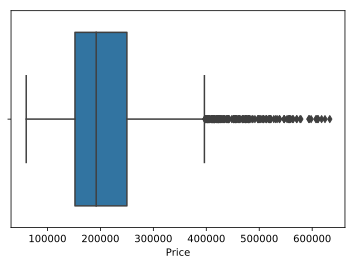

In [60]:
sns.boxplot(valid['Price'])

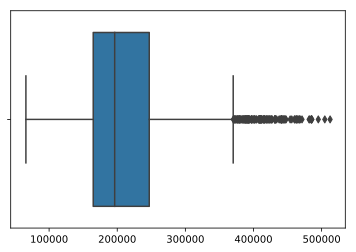

In [61]:
sns.boxplot(pred_valid);

### Prediction on test data

In [63]:
test = pd.read_csv('test.csv')

In [64]:
test = prepare_data(test)

In [65]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.907000,56.551196,39.264239,7.782619,7.915800,12.967800,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.917600
std,4832.674037,44.179466,0.810976,18.954490,16.794980,1.961792,4.677509,6.469091,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,16.319015,9.495367,4.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.951045,27.494796,7.000000,5.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,53.051069,36.242229,7.537288,7.000000,14.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,47.251672,9.000000,10.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,16795.000000,212.000000,6.000000,223.453689,155.788613,24.000000,46.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [69]:
test['Price'] = grid.predict(test.iloc[:, 1:])

In [70]:
test.loc[:, ['Id', 'Price']].to_csv('ANovikov_predictions.csv', index=None)

In [71]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.000000,6.0,14.0,1972.0,0.310199,1,1,11,2748,1,0.0,0,0,1,166107.836805
1,15856,74,2.0,69.263183,61.725896,7.537288,7.0,1.0,1977.0,0.075779,1,1,6,1437,3,0.0,0,2,1,226790.375555
2,5480,190,1.0,56.236982,15.948246,12.000000,2.0,5.0,1909.0,0.000000,1,1,30,7538,87,4702.0,5,5,1,321181.197138
3,15664,47,2.0,73.046609,51.940842,9.000000,22.0,22.0,2007.0,0.101872,1,1,23,4583,3,0.0,3,3,1,330897.255562
4,14275,27,1.0,47.527111,43.387569,7.537288,17.0,17.0,2017.0,0.072158,1,1,2,629,1,0.0,0,0,0,139698.130243
